# CLUSTERING OF I2C POWER TRACES

In [20]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from fastdtw import fastdtw

In [12]:
MIN_LENGTH = 3800

In [3]:
offset = 100
def get_signals(dir, max_no_signals = 10):
    '''
    gets signals from specified directory 
    and returns a (n, l, 1) numpy array
    where n is number of distinct signals and
    l is length of each signal.
    '''
    directory = dir

    list_of_signals = []

    n = 0

    for filename in os.listdir(directory):
        filename = directory + '/' + filename
        list_of_signals.append(np.genfromtxt(filename, delimiter=','))
        n+=1
    
    no_signals = len(list_of_signals) # comment out if doing subsampling for testing
    
    signals = np.zeros([no_signals, MIN_LENGTH])   # replace 5 with n ! 

    for i, arr in enumerate(list_of_signals):
        arr = arr[offset:MIN_LENGTH+offset]
        signals[i] = arr #.reshape(l,1)

    print("Signals loaded. Length of a signal is %d, No. of signals is: %d" % (len(signals[0]), no_signals))
    return signals, no_signals

def plot_signals(signals, name):
    avg = np.average(signals, axis=0)
    std = np.std(signals, axis=0)
    x = range(signals.shape[1])

    plt.style.use('ggplot') #Change/Remove This If you Want
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(x, avg, alpha=0.5, color='red', label=name, linewidth = 1.0)
    ax.fill_between(x, avg - std, avg + std, color='#888888', alpha=0.4)
    ax.fill_between(x, avg - 2*std, avg + 2* std, color='#888888', alpha=0.2)
    ax.legend(loc='best')
    ax.set_ylabel("Signal units?")
    ax.set_xlabel("Time")
    plt.show()

Signals loaded. Length of a signal is 3800, No. of signals is: 961


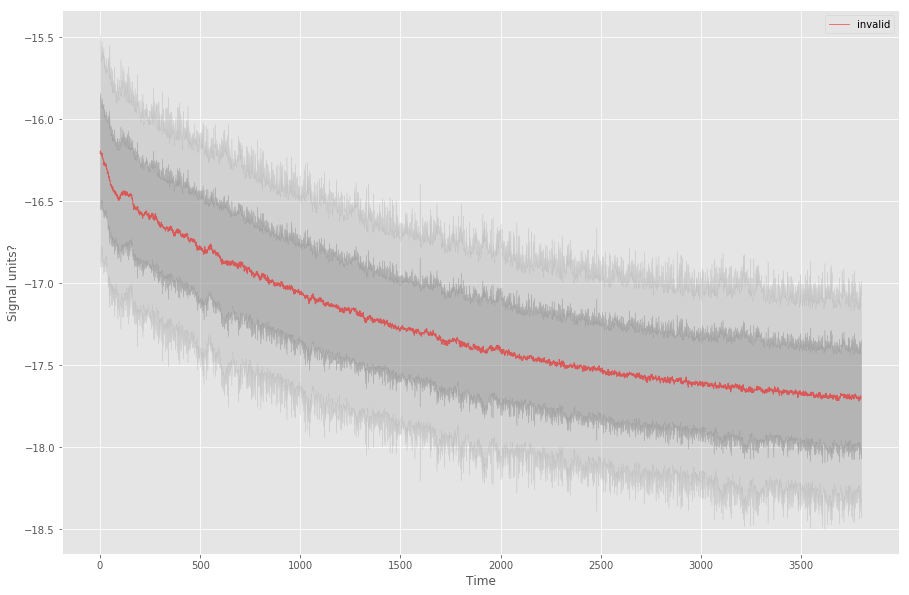

In [14]:
signals, no_samples = get_signals('../Scripts/Applications/Data_processing/signals-3')
plot_signals(signals, 'invalid')

In [16]:
div = 100

def downsample(s, R):
    s = s.reshape(-1, R)
    return s.reshape(-1, R).mean(axis=1)

def downsample_signals(signals):
    downsampled_signals = np.zeros([signals.shape[0], MIN_LENGTH//div])
    
    for i, signal in enumerate(signals):
        downsampled_signals[i] = downsample(signal, div)
        
    return downsampled_signals

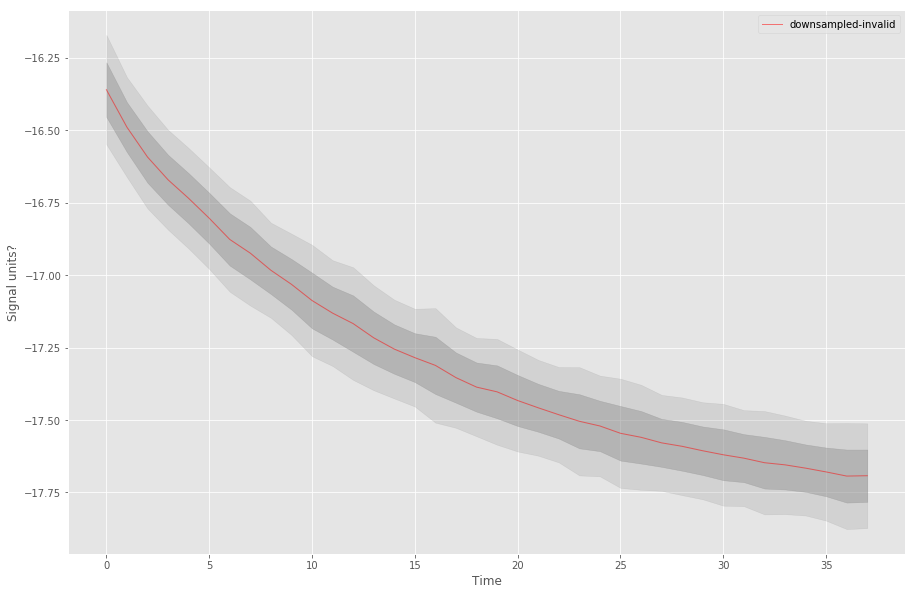

In [18]:
downsampled_signals = downsample_signals(signals)
plot_signals(downsampled_signals, 'downsampled-invalid')

In [27]:
def dtw(x, y):
    distance, path = fastdtw(x, y, dist=1)
    return distance

dtw(downsampled_signals[1], downsampled_signals[22])

/home/johnny/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  


1.2958984371899867

In [45]:
from sklearn.cluster import DBSCAN
clus = DBSCAN(eps=0.2, min_samples=2, metric=dtw).fit(downsampled_signals)

In [46]:
unique, counts = np.unique(clus.labels_, return_counts=True)
dict(zip(unique, counts))

{-1: 919,
 0: 3,
 1: 3,
 2: 2,
 3: 2,
 4: 2,
 5: 3,
 6: 3,
 7: 4,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 2}

In [51]:
def plot_clusters(data, labels):
    import pandas as pd

    timeSeries = pd.DataFrame(data = data)

    # check the results
    s = pd.Series(labels)
    clusters = s.unique()

    for c in clusters[1:]:
        cluster_indices = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indices)))
        timeSeries.T.iloc[:,cluster_indices].plot(figsize=(20,15))
        plt.show()

Cluster 0 number of entries 3


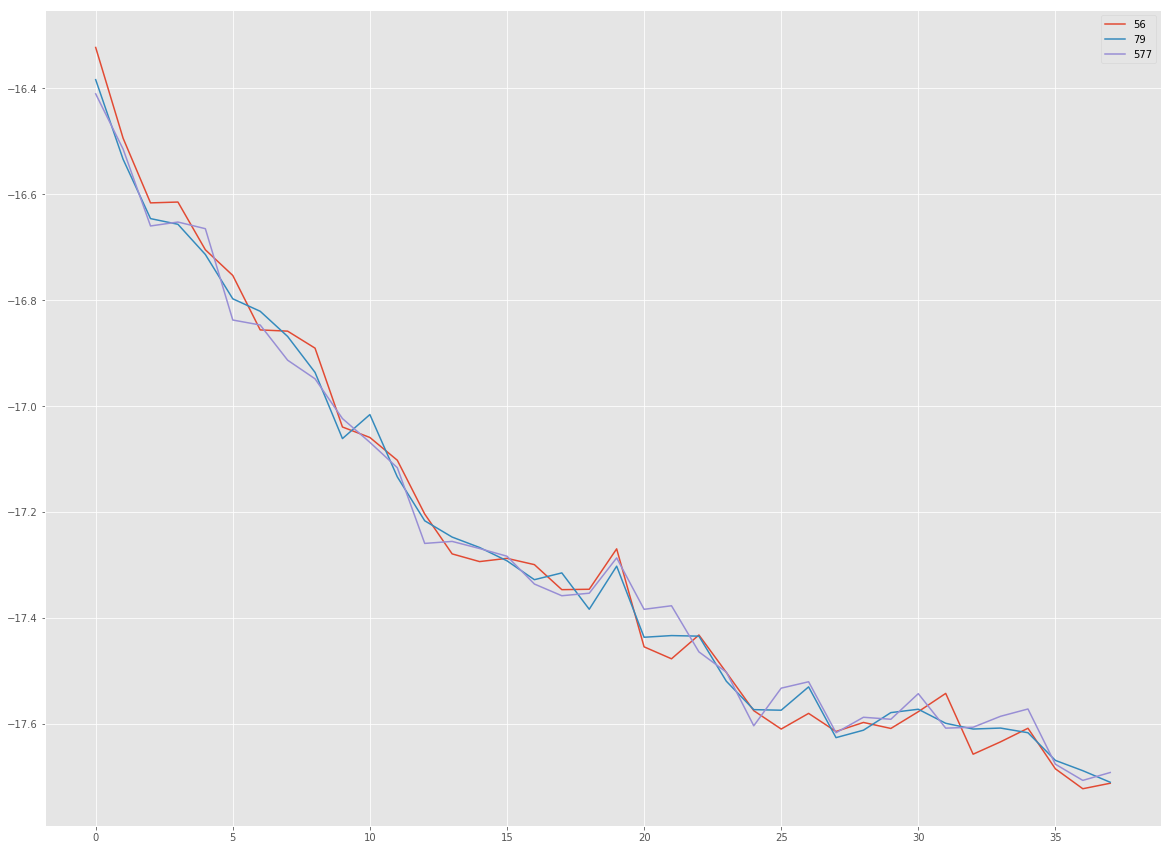

Cluster 1 number of entries 3


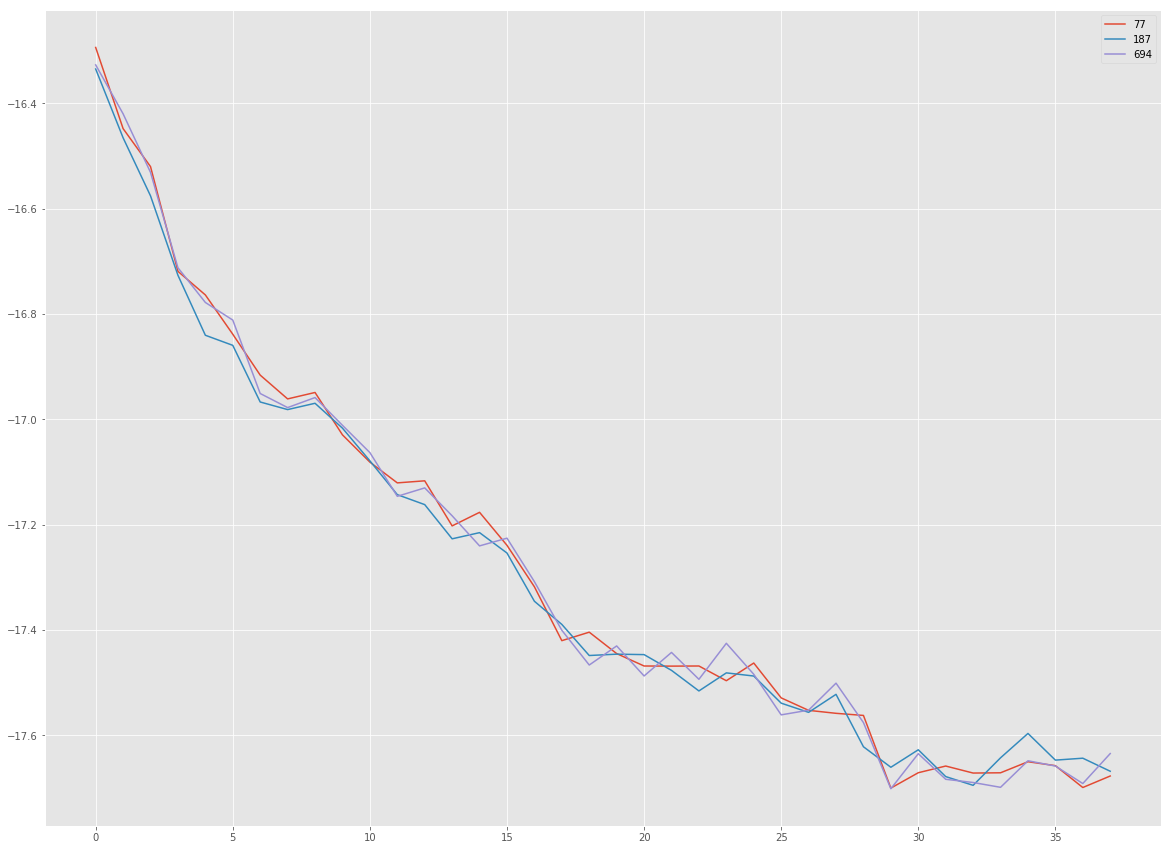

Cluster 2 number of entries 2


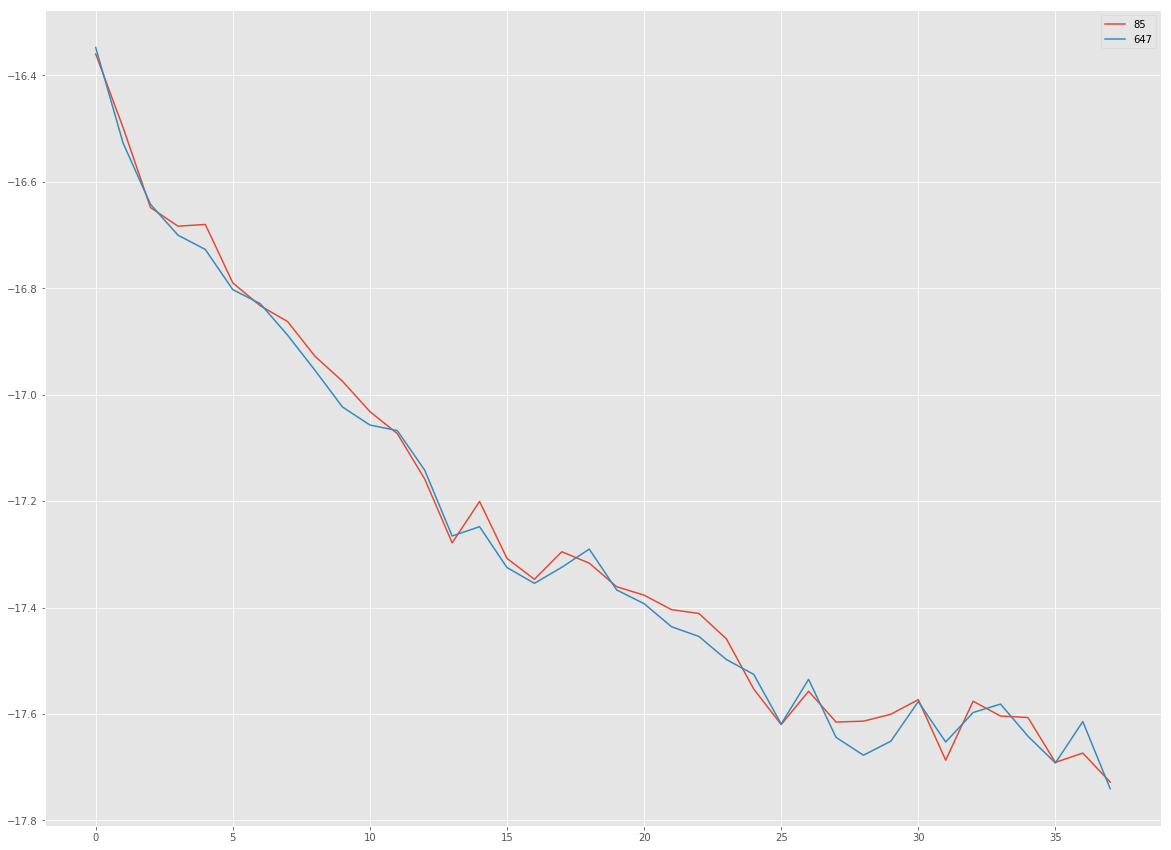

Cluster 3 number of entries 2


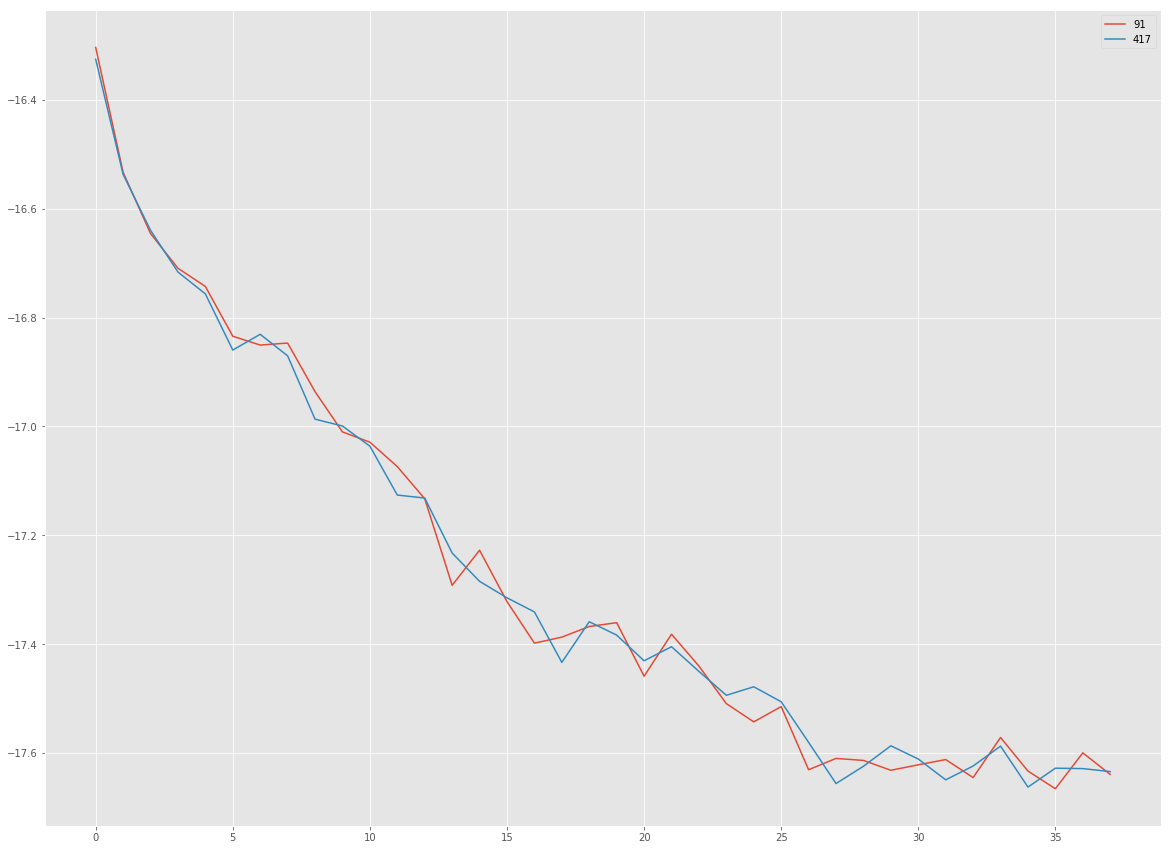

Cluster 4 number of entries 2


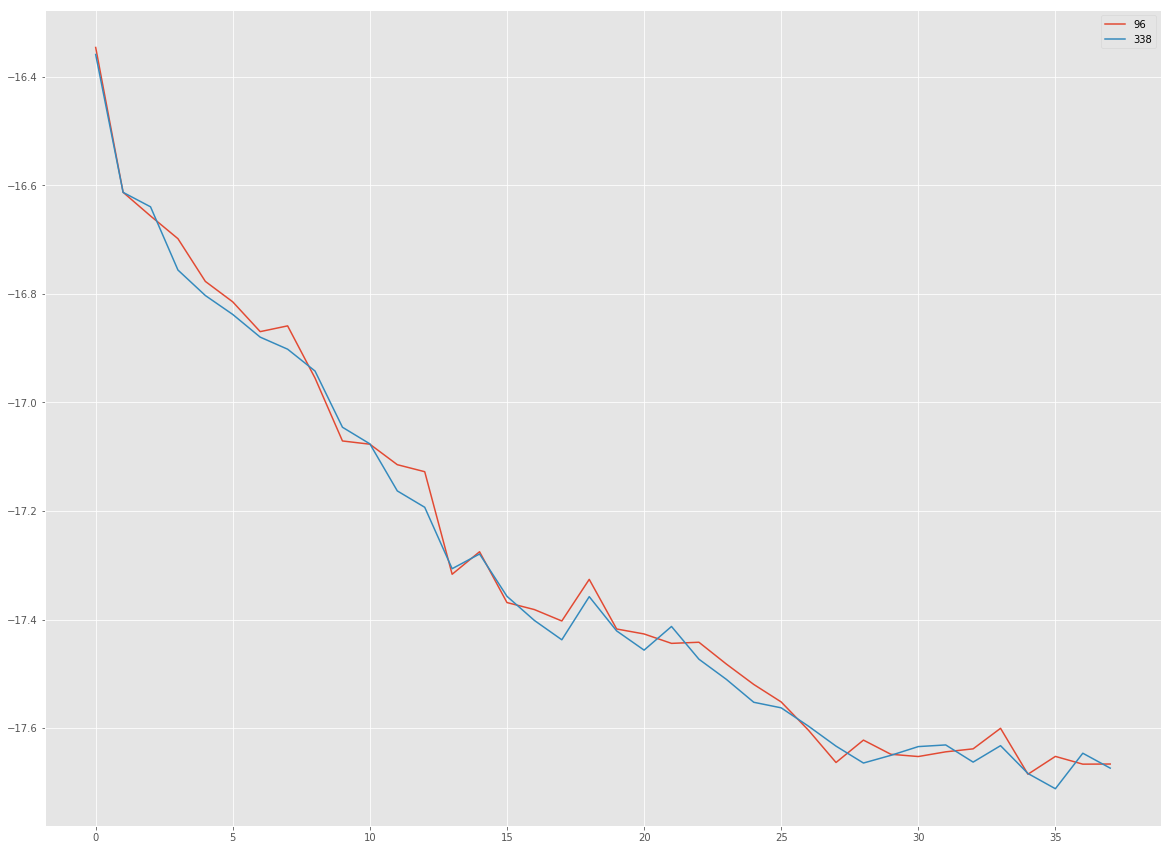

Cluster 5 number of entries 3


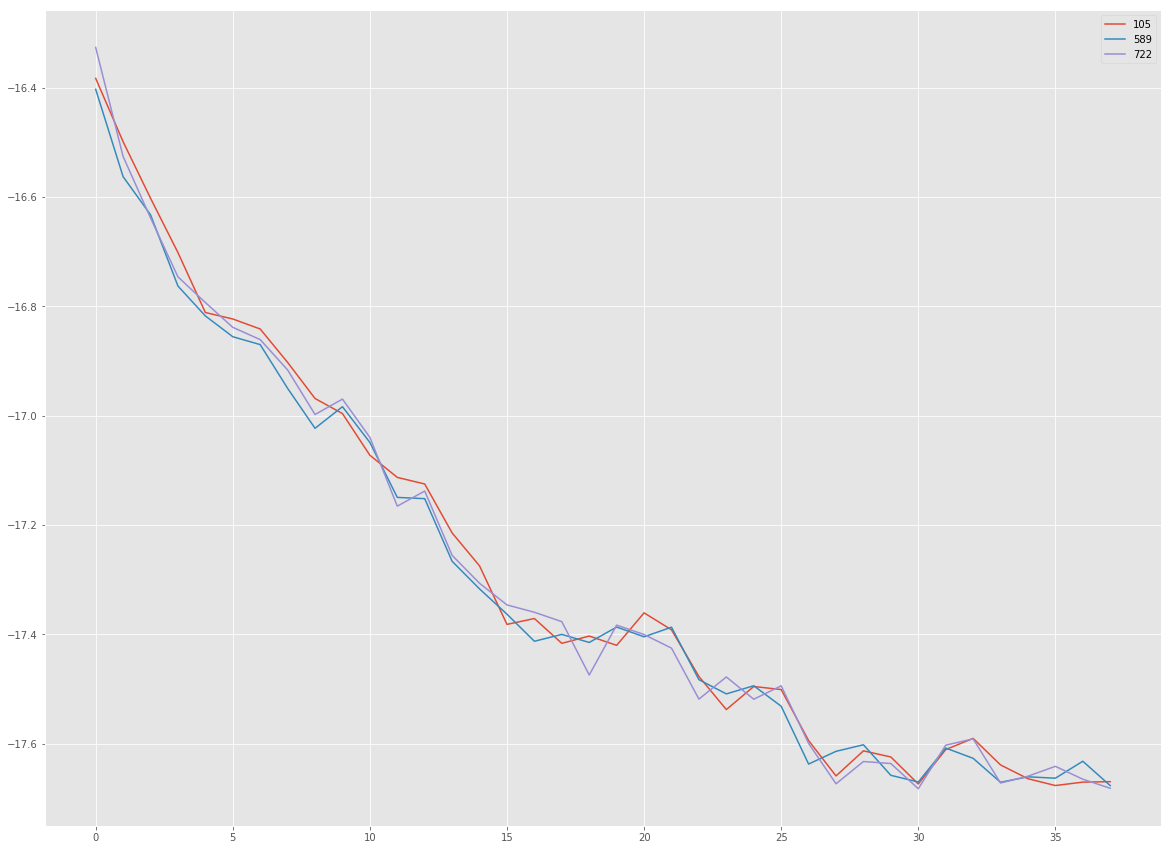

Cluster 6 number of entries 3


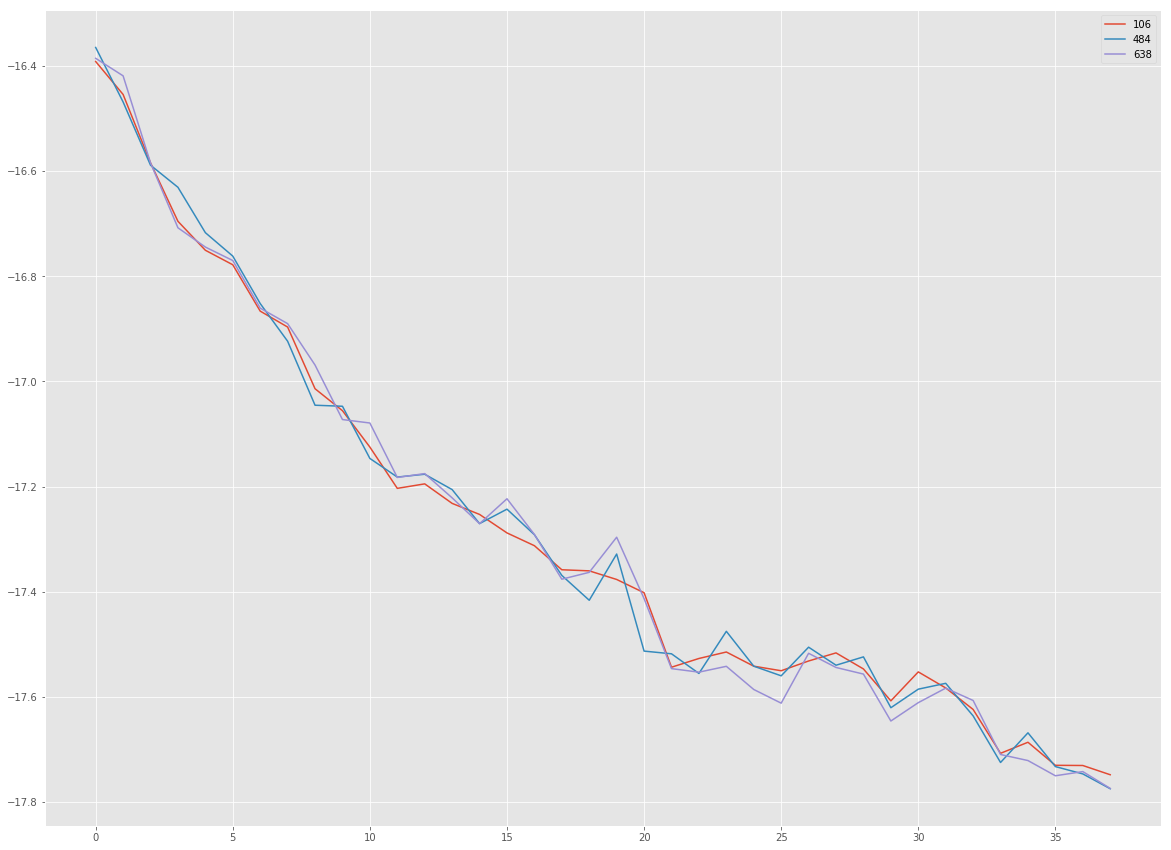

Cluster 7 number of entries 4


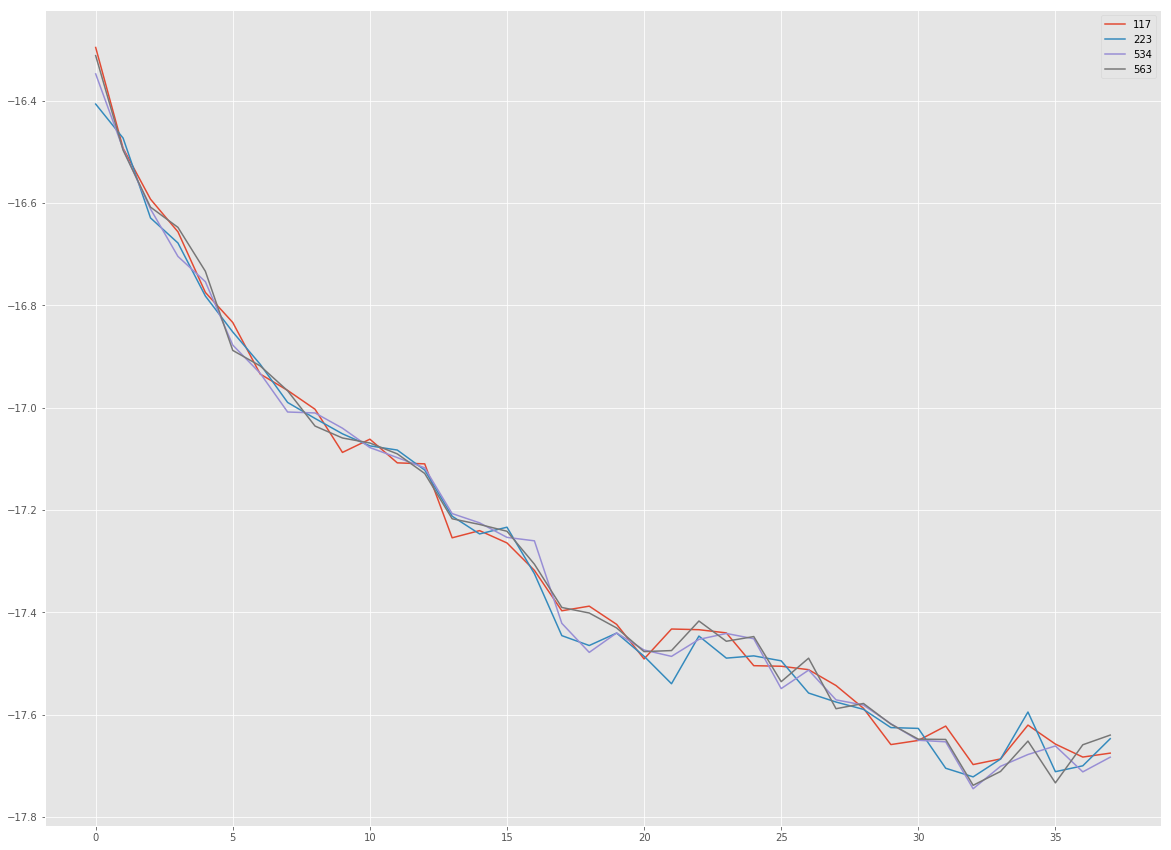

Cluster 8 number of entries 2


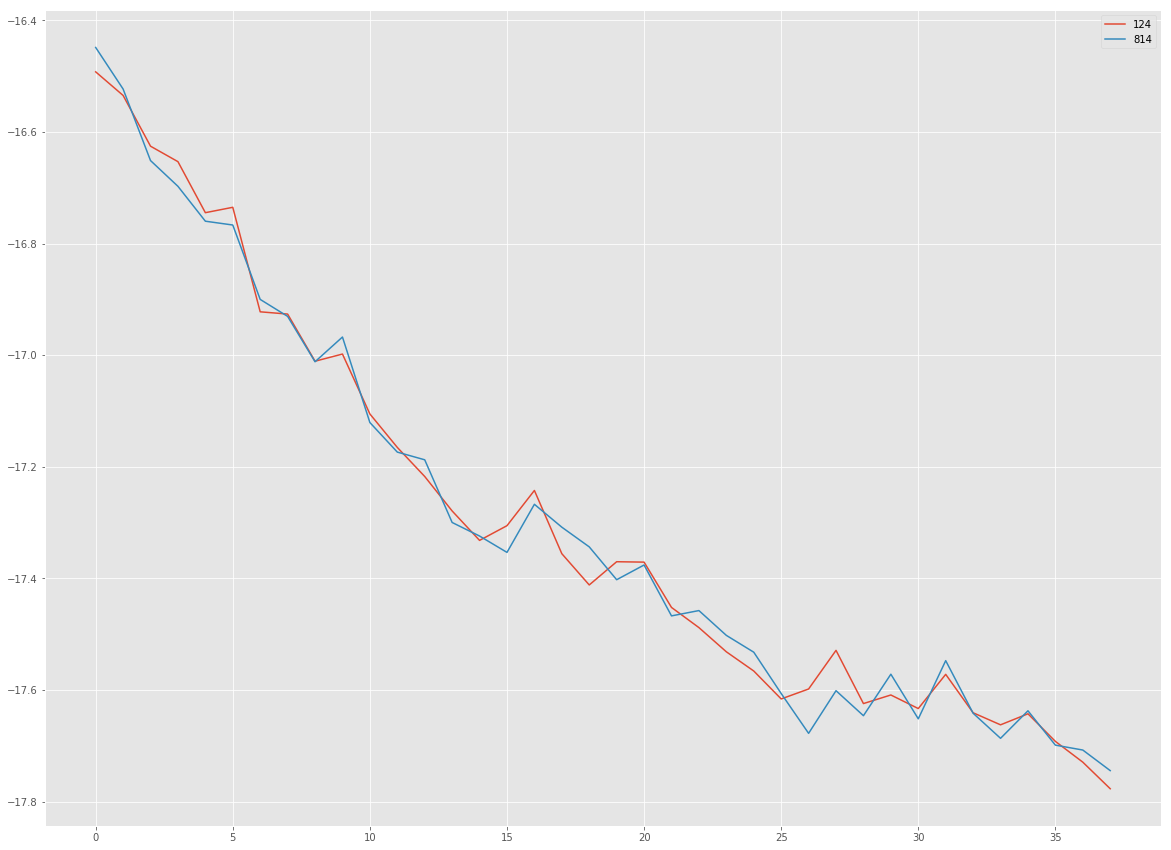

Cluster 9 number of entries 2


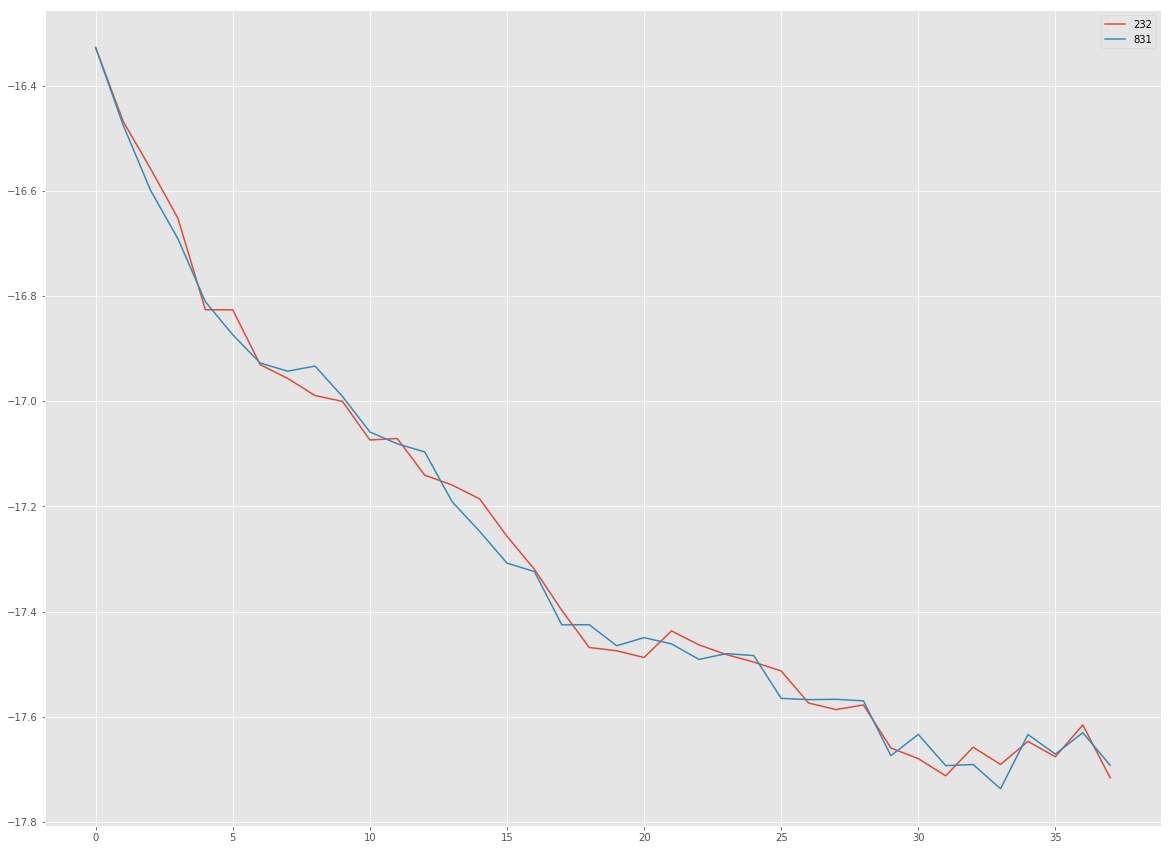

Cluster 10 number of entries 2


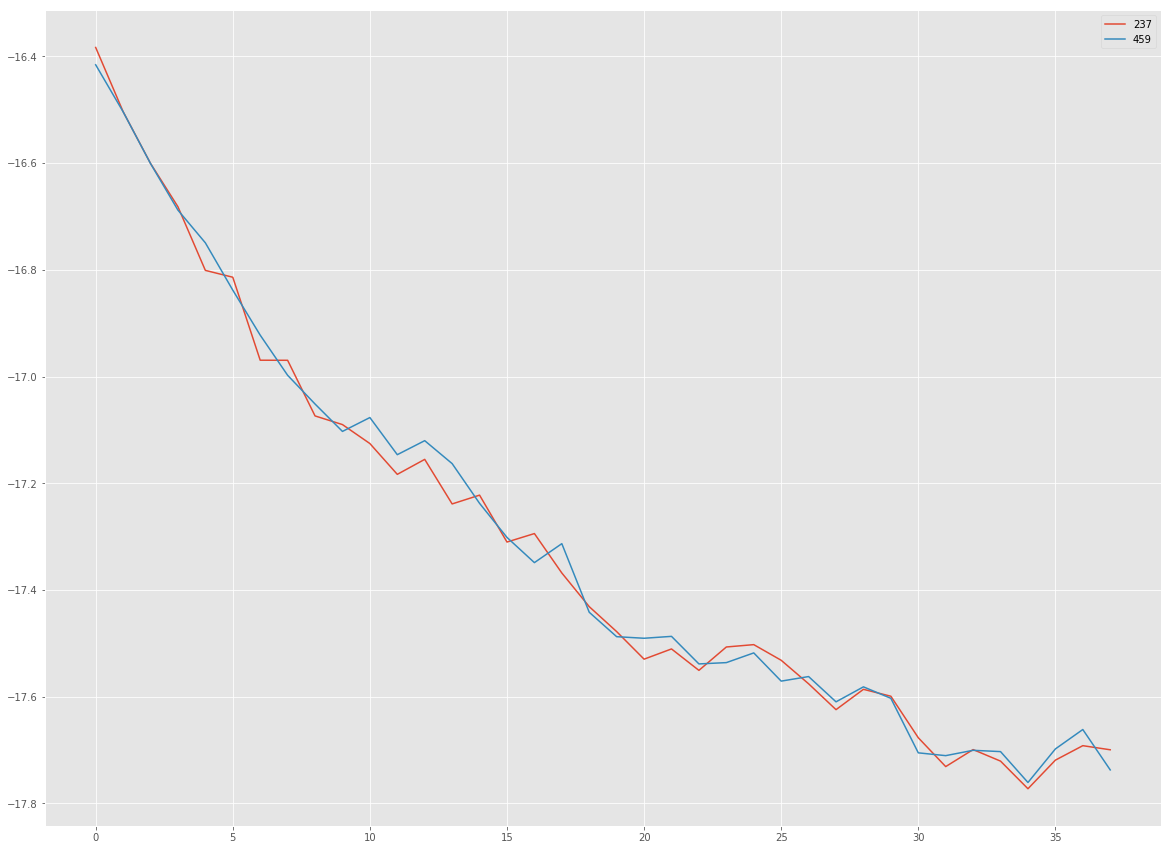

Cluster 11 number of entries 2


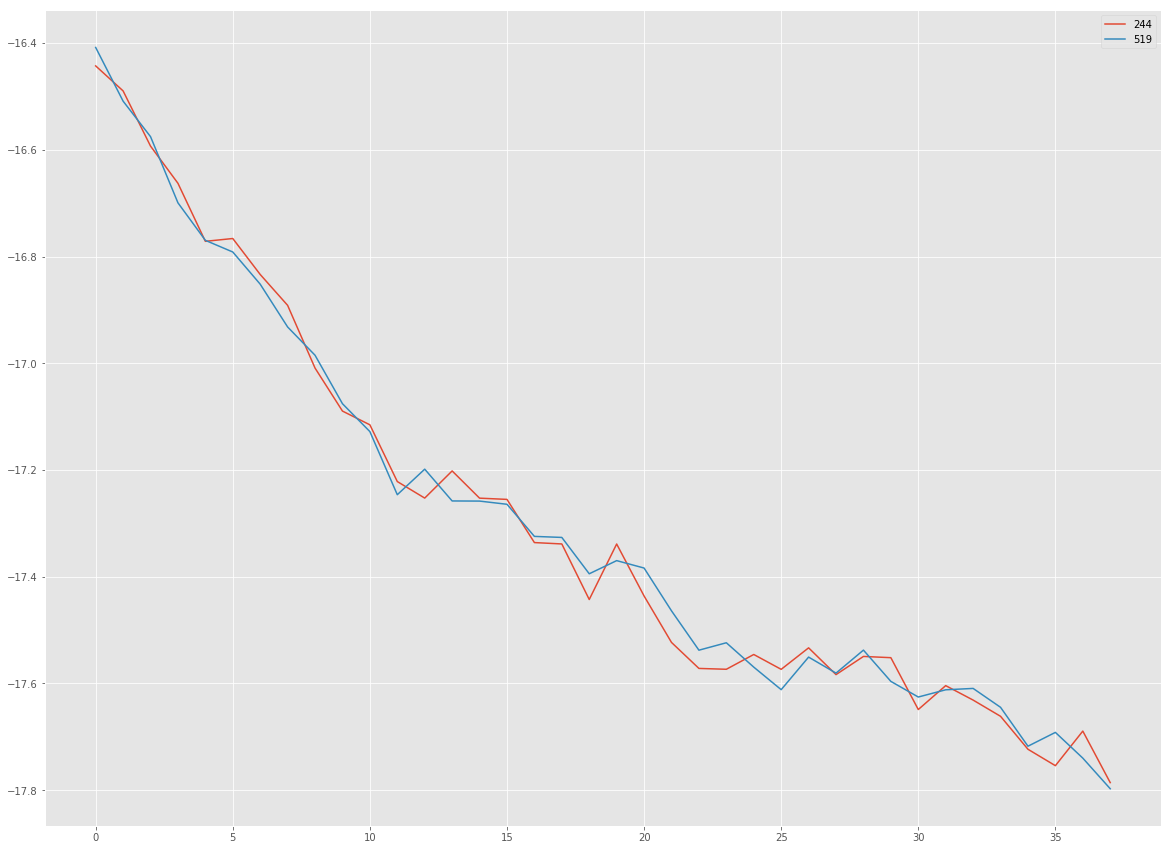

Cluster 12 number of entries 2


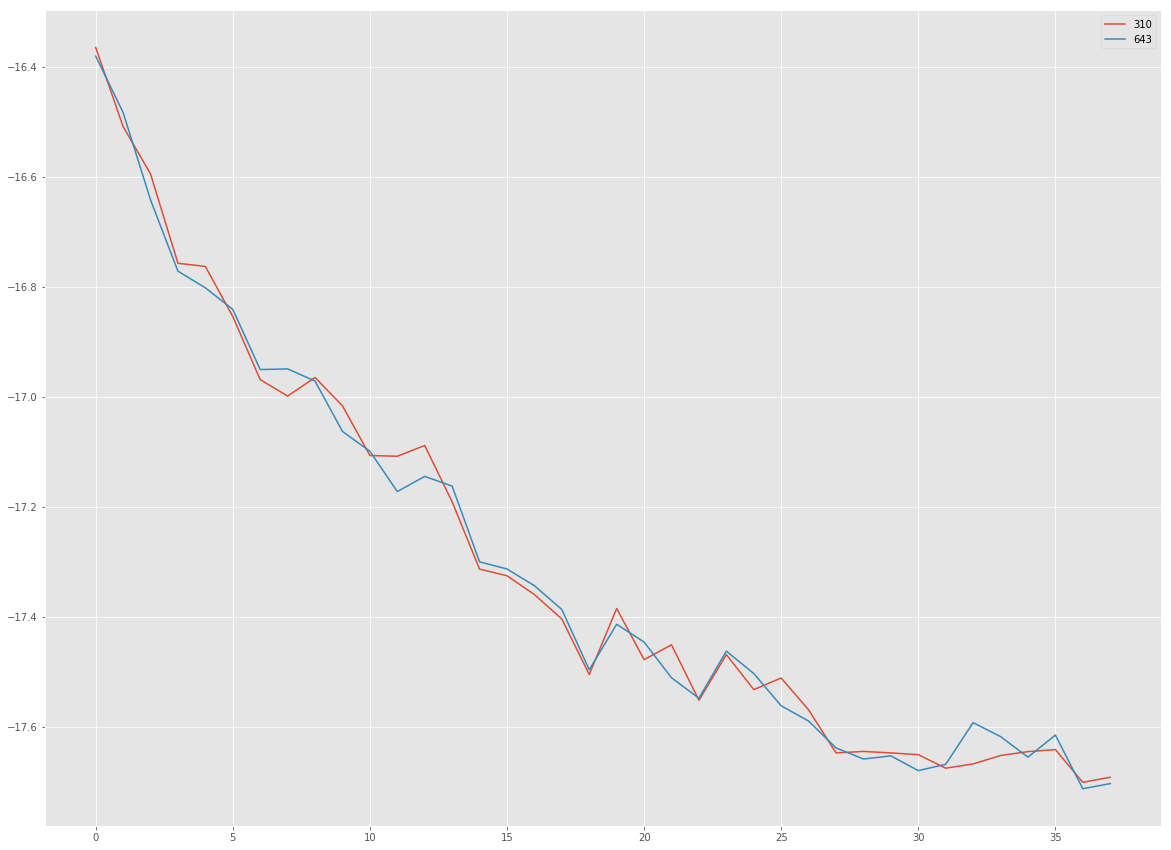

Cluster 13 number of entries 2


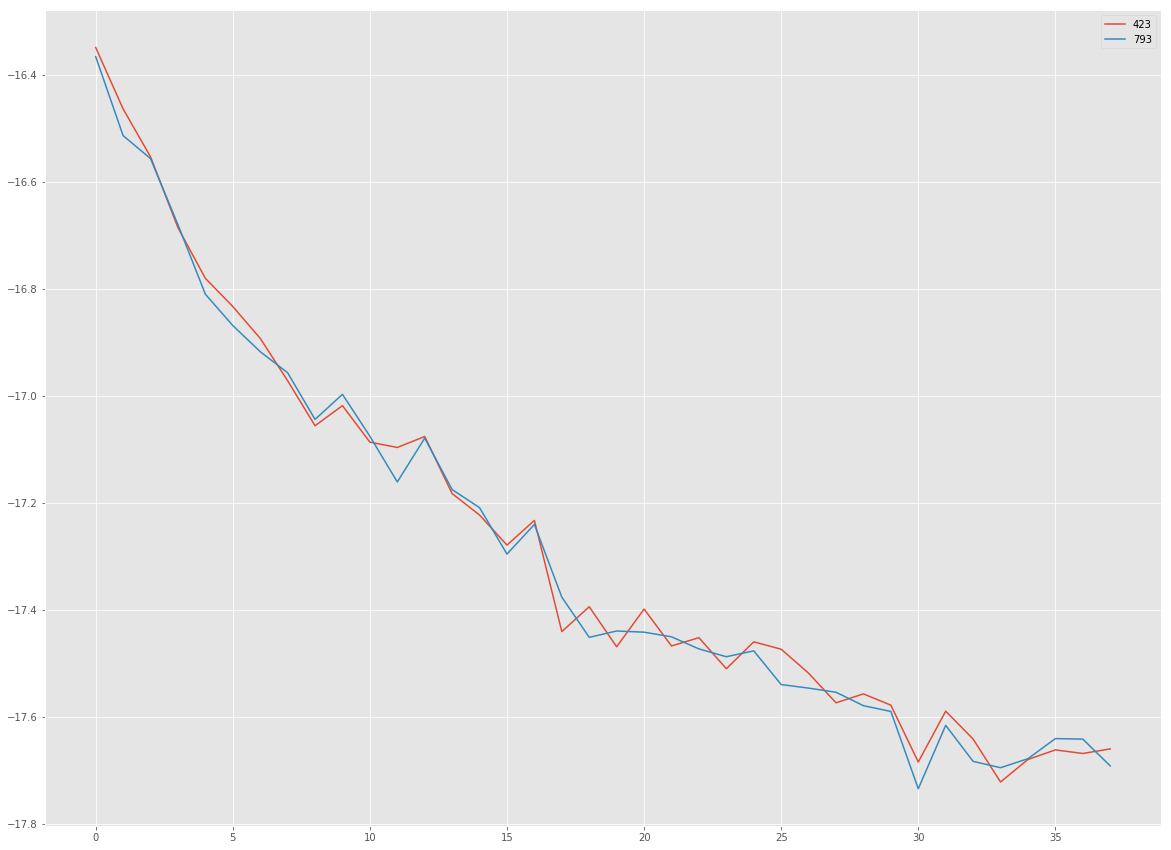

Cluster 14 number of entries 2


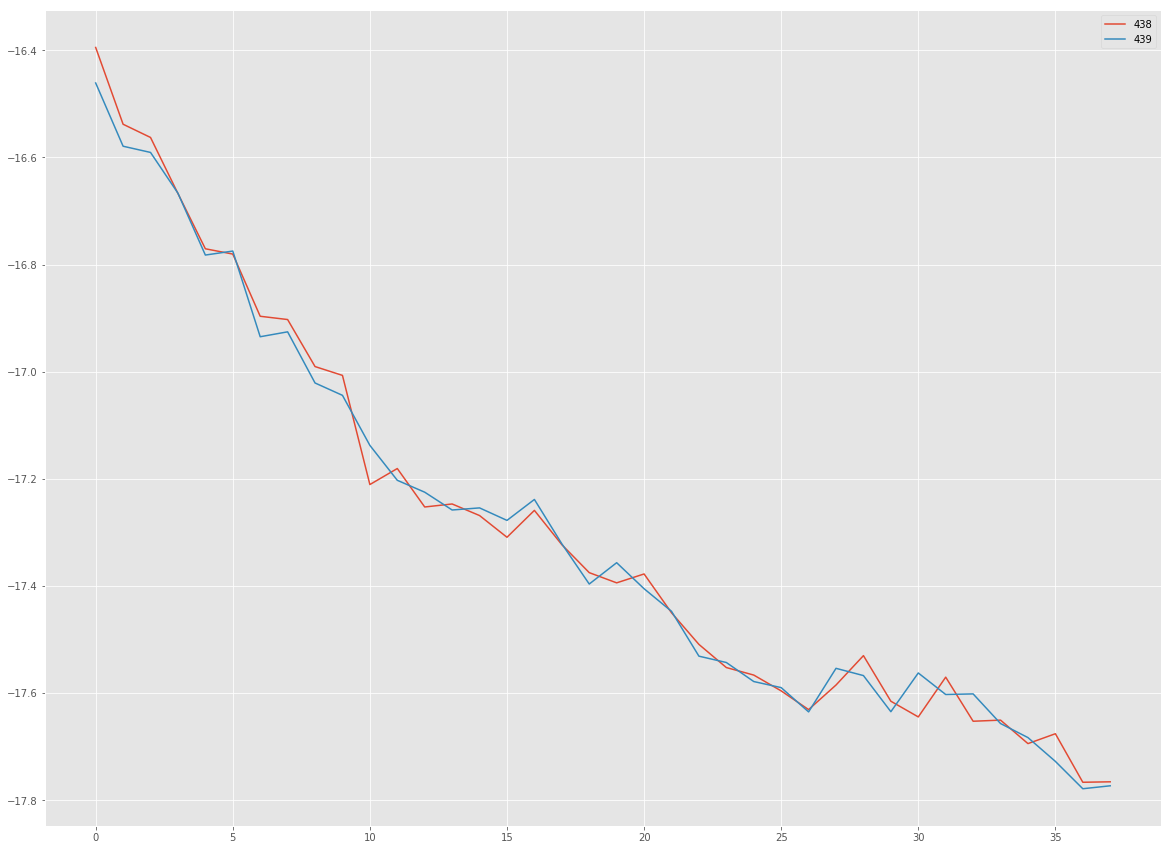

Cluster 15 number of entries 2


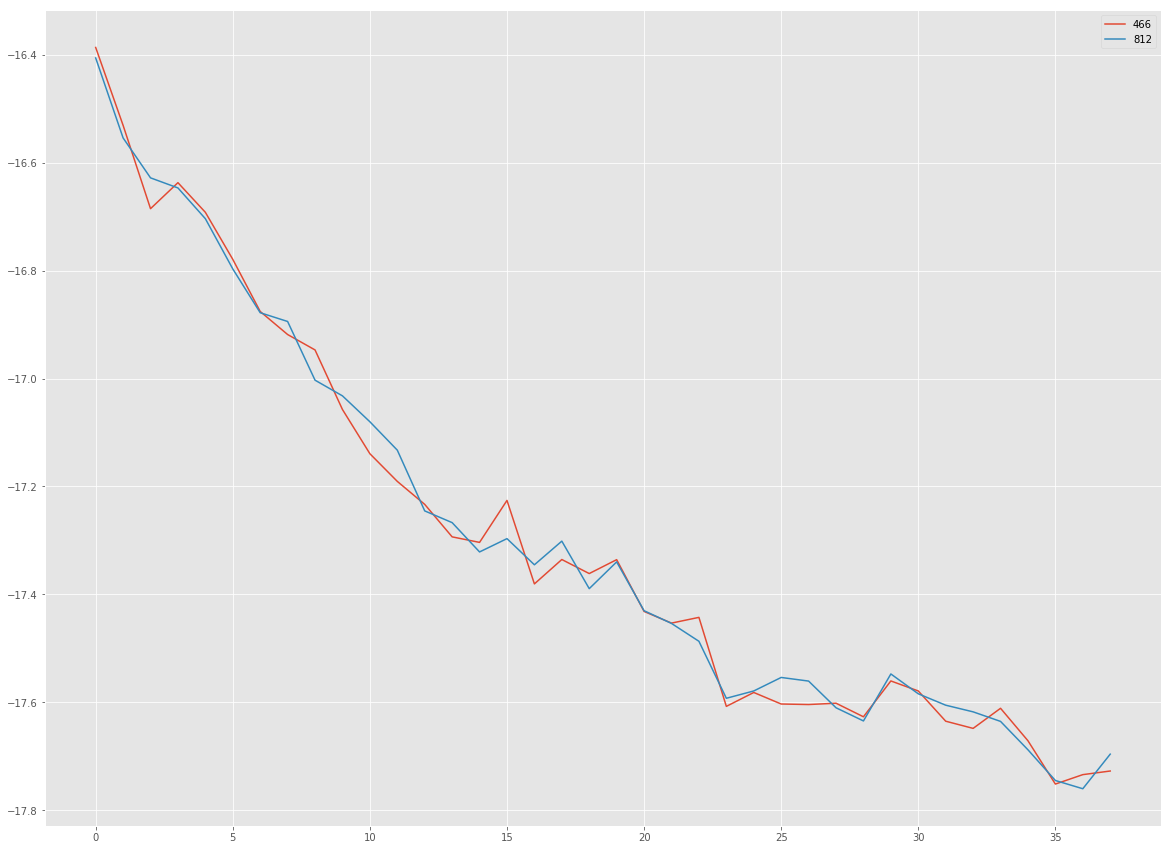

Cluster 16 number of entries 2


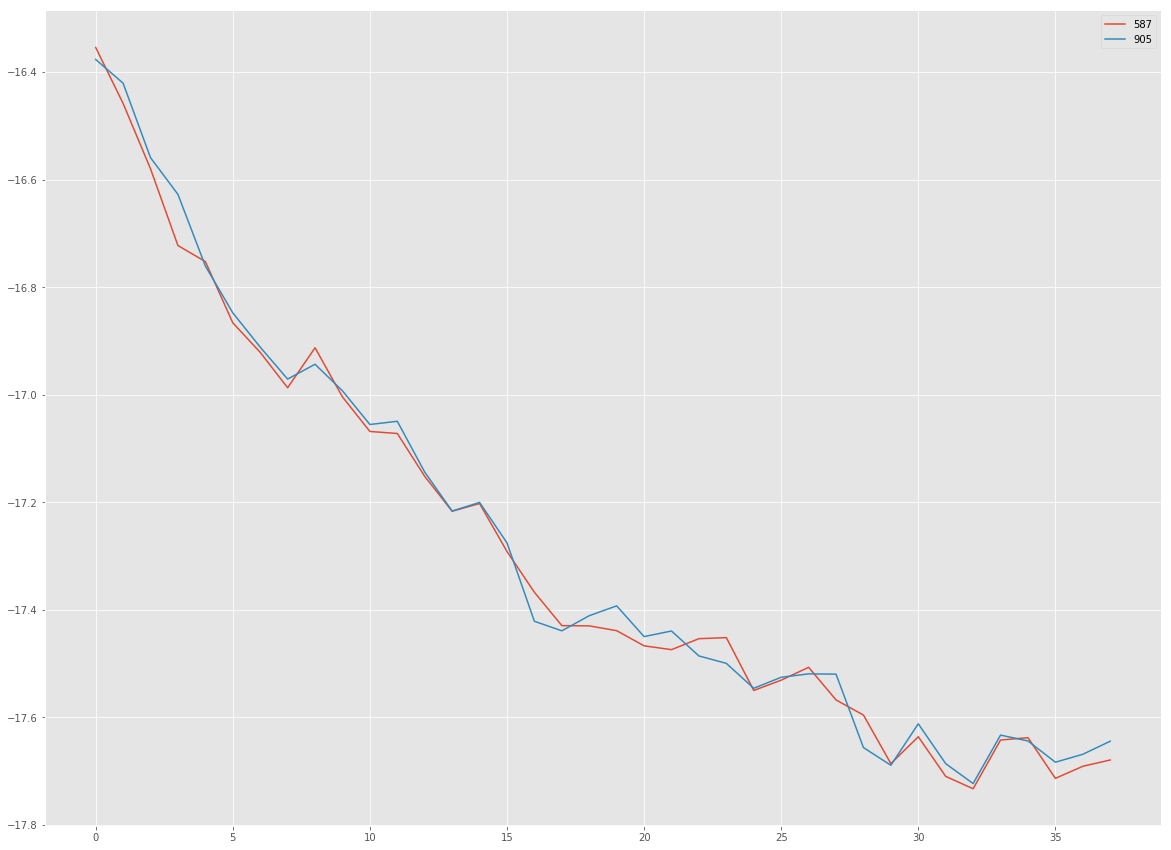

Cluster 17 number of entries 2


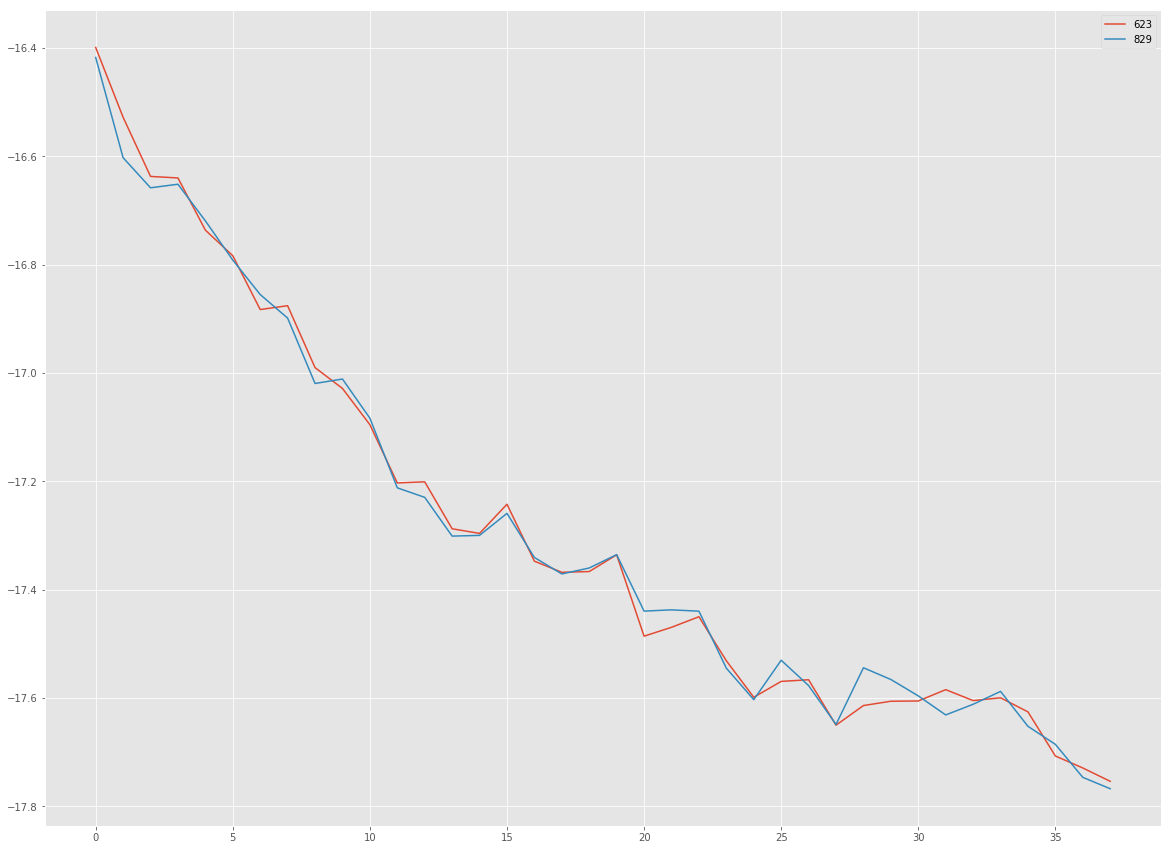

In [52]:
plot_clusters(downsampled_signals, clus.labels_)